# Scyne Advisory


# 🚦 Australian Road Deaths Database – Case Study Analysis

This notebook forms part of my **Scyne Advisory – Data & Digital Insights** case study submission.  
The goal is to demonstrate **hypothesis-driven problem solving, data cleaning, statistical and machine learning analysis, and clear storytelling** using the *Australian Road Deaths Database (ARDD)*.

---

## 📌 Objective
To explore and analyse the ARDD dataset (fatal road crashes across Australia) in order to:
- Identify the **key factors that contribute to road fatalities** (e.g. time of day, age, road type, speed limits, vehicle involvement, etc.).
- Apply **statistical methods** (e.g. regression, correlations) and **machine learning models** (e.g. feature importance from decision trees/forests) to uncover deeper insights.
- Present clear **visualisations** (heatmaps, time trends, maps, demographic breakdowns).
- Provide **recommendations** for the Australian road safety authority on how to monitor and reduce road fatalities.

---

## 🗂️ Dataset
- **File:** `bitre_fatalities_aug2025.xlsx`  
- **Source:** [Bureau of Infrastructure and Transport Research Economics (BITRE)](https://www.bitre.gov.au/statistics/safety/fatal_road_crash_database)  
- **Coverage:** Fatalities across Australian states and territories (multi-year, 1990–2025).  
- **Note:** Dataset contains metadata in the first 4 rows, with data beginning at **row 5**. Missing values are encoded as `-9`.

---

## 🔎 Approach (Sections in this Notebook)
1. **Aim & Hypotheses** – Frame questions and expected factors.
2. **Loading Data** – Import dataset, handle missing values, set column names.
3. **Data Overview** – Inspect head, summary statistics, nulls.
4. **Data Cleaning & Preparation** – Transform and engineer useful features.
5. **Exploratory Data Analysis (EDA)** – Trends, distributions, and patterns.
6. **Correlation & Statistical Analysis** – Heatmap, regression analysis.
7. **Machine Learning (Optional)** – Feature importance via ML models.
8. **Key Insights & Recommendations** – Summarise findings and implications.

---


# 1. Aims and Hypothesis

# 2. Loading Data

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

# --- Config ---
DATA_PATH = Path(r"H:\Personal GitHub Repos\Noorullah-Khan-Github-Repository\Scyne Advisory Interview\bitre_fatalities_aug2025.xlsx")

# --- Load (skip first 4 metadata rows) ---
df = pd.read_excel(DATA_PATH, skiprows=4, engine="openpyxl")

# Replace sentinel missing values
df.replace(-9, np.nan, inplace=True)

print("✅ Data loaded successfully from:", DATA_PATH.name)



✅ Data loaded successfully from: bitre_fatalities_aug2025.xlsx


In [2]:
import sys
print(sys.executable)


c:\Users\Nooru\comp3420\Scripts\python.exe


# 3. Data Overview

In [4]:
# Basic structure
print("Rows, Columns:", df.shape)
print("\nColumn names:\n", list(df.columns))

print("\n--- dtypes ---")
print(df.dtypes)

print("\n--- Missing values per column ---")
missing_summary = df.isna().sum().sort_values(ascending=False)
display(missing_summary[missing_summary > 0])

# Quick peek
display(df.head())

# Optional: quick stats (numeric + categorical)
print("\n--- Numeric summary ---")
display(df.describe().T)

print("\n--- Categorical sample counts (top 5 each) ---")
for col in df.select_dtypes(include="object").columns[:6]:  # limit to first few to keep output tidy
    print(f"\n{col}:")
    display(df[col].value_counts(dropna=False).head(5))


Rows, Columns: (57761, 20)

Column names:
 ['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type', 'Bus Involvement', 'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender', 'Age', 'National Remoteness Areas 2021', 'SA4 Name 2021', 'National LGA Name 2021', 'National Road Type', 'Christmas Period', 'Easter Period']

--- dtypes ---
Crash ID                            int64
State                              object
Month                               int64
Year                                int64
Dayweek                            object
Time                               object
Crash Type                         object
Bus Involvement                    object
Heavy Rigid Truck Involvement      object
Articulated Truck Involvement      object
Speed Limit                       float64
Road User                          object
Gender                             object
Age                               float64
National Remote

Speed Limit    1458
Age             102
dtype: int64

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas 2021,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period
0,3199702230051,QLD,2,1997,Sunday,17:00:00,Multiple,No,-9,No,60.0,Pedal cyclist,Male,14.0,Unknown,Unknown,Unknown,Unknown,No,No
1,5199206210077,WA,6,1992,Sunday,19:00:00,Multiple,No,-9,No,110.0,Passenger,Female,17.0,Unknown,Unknown,Unknown,Unknown,No,No
2,2199001090011,VIC,1,1990,Tuesday,21:05:00,Multiple,No,No,No,60.0,Pedal cyclist,Male,24.0,Unknown,Unknown,Unknown,Unknown,No,No
3,2199105060163,VIC,5,1991,Monday,06:40:00,Multiple,No,No,No,60.0,Motorcycle rider,Male,22.0,Unknown,Unknown,Unknown,Unknown,No,No
4,3199401160012,QLD,1,1994,Sunday,09:00:00,Single,No,-9,No,100.0,Motorcycle rider,Male,28.0,Unknown,Unknown,Unknown,Unknown,No,No



--- Numeric summary ---


,count,mean,std,min,25%,50%,75%,max
Crash ID,57761.0,4.582415e+17,1.616410e+18,620172123.0,1.200311e+12,2.201409e+12,5.199206e+12,9.220898e+18
Month,57761.0,6.566541e+00,3.459252e+00,1.0,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
Year,57761.0,2.004478e+03,1.065070e+01,1989.0,1.995000e+03,2.003000e+03,2.013000e+03,2.025000e+03
Speed Limit,56303.0,8.291725e+01,2.073463e+01,5.0,6.000000e+01,8.000000e+01,1.000000e+02,1.300000e+02
Age,57659.0,4.024978e+01,2.182991e+01,0.0,2.200000e+01,3.500000e+01,5.600000e+01,1.010000e+02



--- Categorical sample counts (top 5 each) ---

State:


State
NSW    17563
VIC    12634
QLD    11643
WA      6974
SA      4908
Name: count, dtype: int64


Dayweek:


Dayweek
Saturday     10459
Friday        9479
Sunday        9273
Thursday      7813
Wednesday     7284
Name: count, dtype: int64


Time:


Time
15:00:00    1235
16:00:00    1147
18:00:00    1070
17:00:00    1062
14:00:00    1028
Name: count, dtype: int64


Crash Type:


Crash Type
Single      31937
Multiple    25815
Unknown         9
Name: count, dtype: int64


Bus Involvement:


Bus Involvement
No     56646
Yes     1060
-9        55
Name: count, dtype: int64


Heavy Rigid Truck Involvement:


Heavy Rigid Truck Involvement
No     35291
-9     20508
Yes     1962
Name: count, dtype: int64

### Data Overview – Summary
The dataset contains ~57k fatal crash records spanning 1989–2025 across all Australian states. 
Initial inspection shows most fields are complete, with some missing values in `Speed Limit` and `Age`, and placeholders (`-9`) in categorical fields. 
Fatalities are most common on weekends, during late afternoons, and NSW records the highest counts.


# 4. Data Cleaning & Preparation
In this step, we:
- Replace placeholder `-9` values with proper `NaN` so they can be treated as missing.  
- Convert Yes/No categorical fields into numeric (1/0) for easier analysis.  
- Extract the `Hour` from crash times.  
- Group `Age` into categories for demographic analysis.  

We are **not filling in missing values** at this stage (no imputation), because these represent genuine unknowns. For now, we retain them as `NaN` and only drop rows later if a particular analysis requires complete cases.


In [5]:
# Replace -9 strings in object columns with NaN
df = df.replace("-9", np.nan)

# Standardise Yes/No fields to 1/0
yes_no_cols = [
    "Bus Involvement",
    "Heavy Rigid Truck Involvement",
    "Articulated Truck Involvement",
    "Christmas Period",
    "Easter Period"
]
for col in yes_no_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0, np.nan: np.nan})

# Parse Time into Hour
df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour

# Bucket Age into groups
bins = [0, 17, 25, 40, 60, 120]
labels = ["<18", "18–25", "26–40", "41–60", "60+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

print("✅ Data cleaned and enriched with Hour + AgeGroup.")
df.head()


✅ Data cleaned and enriched with Hour + AgeGroup.


C:\Users\Nooru\AppData\Local\Temp\ipykernel_35568\4044375170.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Gender,Age,National Remoteness Areas 2021,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Hour,AgeGroup
0,3199702230051,QLD,2,1997,Sunday,17:00:00,Multiple,0.0,NaN,0.0,...,Male,14.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,17.0,<18
1,5199206210077,WA,6,1992,Sunday,19:00:00,Multiple,0.0,NaN,0.0,...,Female,17.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,19.0,<18
2,2199001090011,VIC,1,1990,Tuesday,21:05:00,Multiple,0.0,0.0,0.0,...,Male,24.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,21.0,18–25
3,2199105060163,VIC,5,1991,Monday,06:40:00,Multiple,0.0,0.0,0.0,...,Male,22.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,6.0,18–25
4,3199401160012,QLD,1,1994,Sunday,09:00:00,Single,0.0,NaN,0.0,...,Male,28.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,9.0,26–40


We now have a cleaned dataset with 22 columns.  
Key transformations included replacing placeholders (`-9`, `Unknown`), encoding Yes/No fields, parsing crash times into hourly values, and creating age groups.  
This ensures the data is consistent, interpretable, and ready for exploratory analysis.  


# 5. Exploratory Data Analysis (EDA)

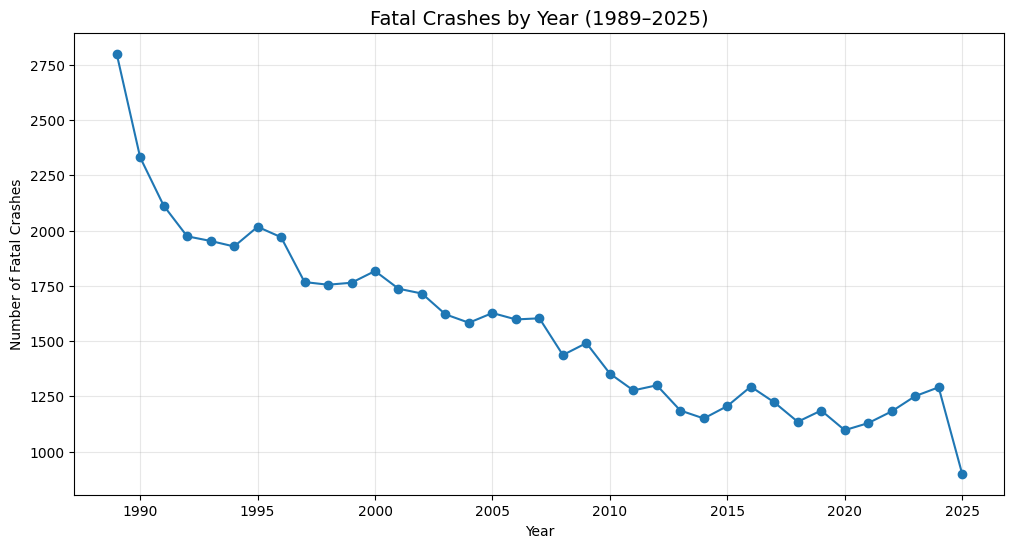

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df["Year"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Fatal Crashes by Year (1989–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Fatal Crashes")
plt.grid(True, alpha=0.3)
plt.show()


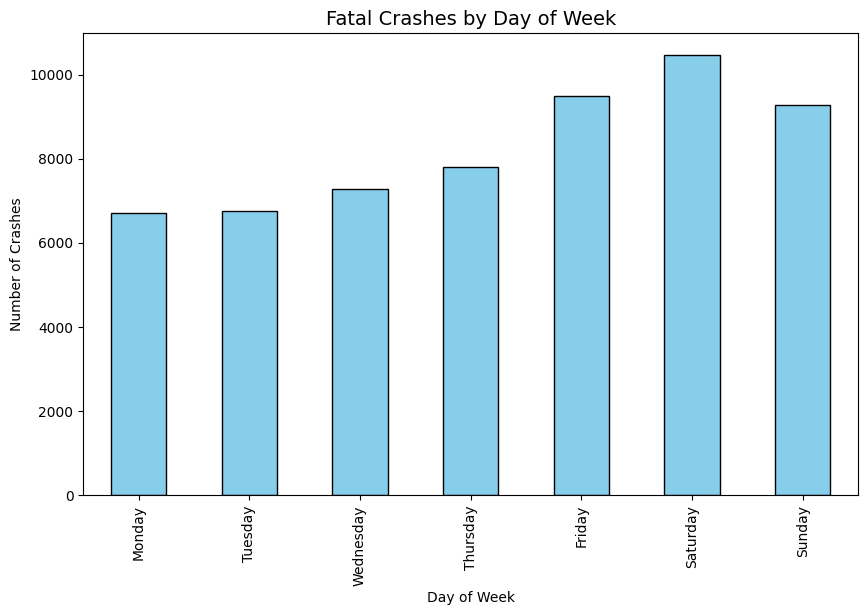

In [7]:
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(10,6))
df["Dayweek"].value_counts().reindex(order).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Fatal Crashes by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Crashes")
plt.show()


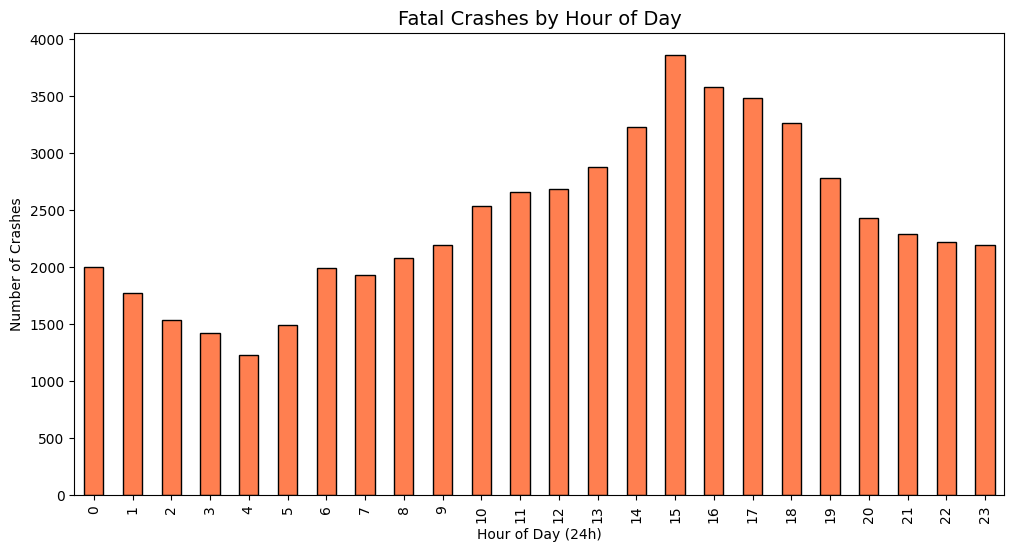

In [8]:
plt.figure(figsize=(12,6))
df["Hour"].dropna().astype(int).value_counts().sort_index().plot(kind="bar", color="coral", edgecolor="black")
plt.title("Fatal Crashes by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Number of Crashes")
plt.show()


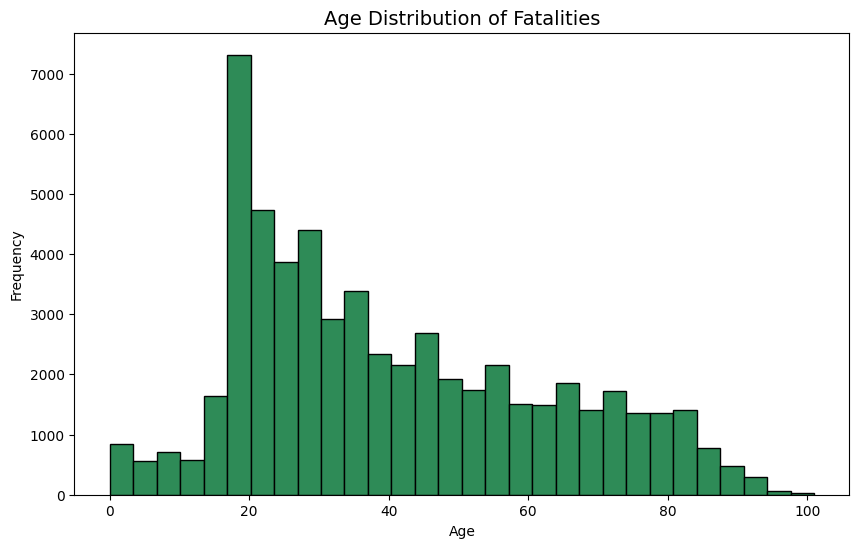

In [9]:
plt.figure(figsize=(10,6))
df["Age"].dropna().plot(kind="hist", bins=30, color="seagreen", edgecolor="black")
plt.title("Age Distribution of Fatalities", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


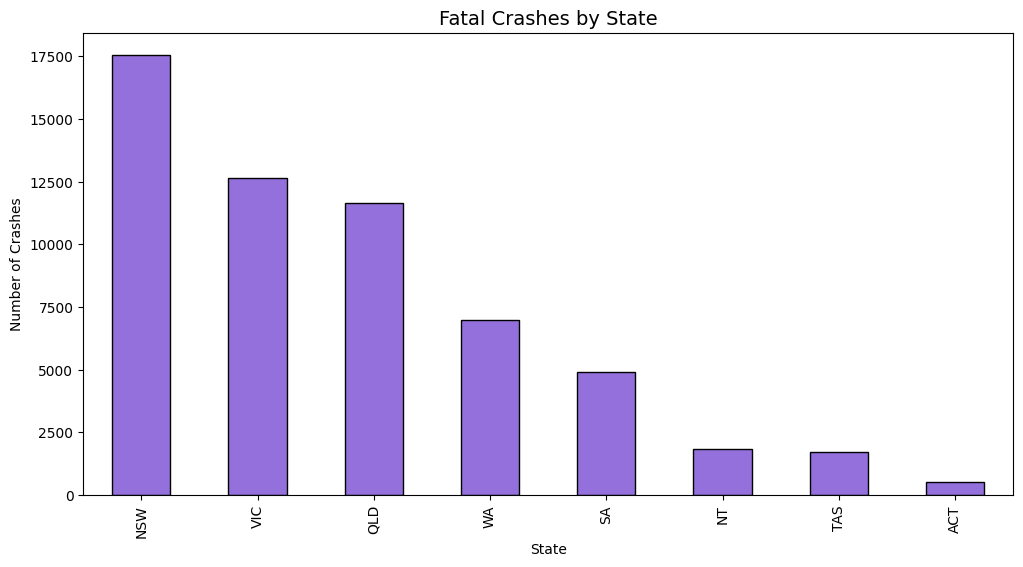

In [10]:
plt.figure(figsize=(12,6))
df["State"].value_counts().plot(kind="bar", color="mediumpurple", edgecolor="black")
plt.title("Fatal Crashes by State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Number of Crashes")
plt.show()


### EDA – Initial Findings

The exploratory analysis highlights several clear patterns in the fatal crash data:

- **Long-term decline:** Fatal crashes have fallen dramatically since 1989, from almost 3,000 deaths per year to fewer than 1,000 in 2025. This reflects improved road safety measures, vehicle technology, and enforcement of safety laws.  
- **Day of week effect:** Saturdays record the highest number of fatalities, followed closely by Fridays and Sundays. Early weekdays (Mon–Tue) have the lowest counts, suggesting that leisure travel, alcohol, and fatigue contribute to weekend risk.  
- **Time of day effect:** Crashes are most frequent in the **afternoon and evening (3–6pm)**, while very early mornings (2–5am) show the lowest rates due to reduced traffic volumes.  
- **Age distribution:** Young people (15–25) are disproportionately represented in fatalities, confirming their higher vulnerability. Middle-aged drivers remain consistently represented, and elderly groups also contribute meaningfully.  
- **Geographic spread:** NSW, VIC, and QLD dominate in fatal crashes, largely reflecting their higher population and vehicle use. Smaller jurisdictions (ACT, TAS, NT) show much lower counts.

**Key takeaway:** Fatal crashes are declining but still heavily influenced by **weekends, peak hours, young drivers, and populous states.**
